## Importar Bibliotecas

In [64]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import math 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import scipy.stats as stats
import pingouin as pg
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

## 1.

O TOC, ou Transtorno Obsessivo-Compulsivo, é um distúrbio psiquiátrico
caracterizado pela presença de obsessões e compulsões. As obsessões são
pensamentos, imagens ou impulsos indesejados e intrusivos que causam
ansiedade significativa. Já as compulsões são comportamentos repetitivos
que uma pessoa se sente compelida a realizar como uma resposta para
aliviar a ansiedade associada às obsessões. 
O Y-BOCS, ou Yale-Brown Obsessive Compulsive Scale (Escala Yale-Brown
para Transtorno Obsessivo-Compulsivo), é uma ferramenta de avaliação
desenvolvida para medir a gravidade dos sintomas em pessoas com TOC.
Essa escala é dividida em duas partes: uma para avaliar as obsessões e
outra para avaliar as compulsões.
A base de dados estruturada “ocd_patient_dataset.csv” é um conjunto de
dados de pacientes com TOC que possui dados demográficos e clínicos que
contém informações abrangentes sobre 1.500 indivíduos com diagnóstico de
transtorno obsessivo-compulsivo (TOC). Observação: o conjunto de dados é
inteiramente fictício e não deve ser usado para quaisquer fins clínicos ou de
pesquisa reais.
Use um nível de significância de 5% para testar a afirmativa de que
existe diferença no Score (Pontuação) Y-BOCS (Obsessões) entre
pacientes dos sexo feminino e masculino. Com base neste resultado,
podemos concluir que existe diferença?
Informações extras: Pontuação Y-BOCS para Obsessões:
A pontuação da parte de obsessões do Y-BOCS avalia a gravidade das
obsessões em termos de tempo gasto, interferência nas atividades diárias,
angústia causada pelas obsessões e resistência em controlá-las. A
pontuação total para obsessões varia de 0 a 40, sendo uma pontuação mais
alta indicativa de sintomas mais graves.
0 a 7: Sintomas leves a moderados.
8 a 15: Sintomas moderados a graves.
16 a 40: Sintomas graves a extremamente graves.
Use as colunas:
(Y-BOCS Score (Obsessions) - Score de obsessão e Gender - sexo).

In [65]:
df = pd.read_csv('ocd_patient_dataset.csv')
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


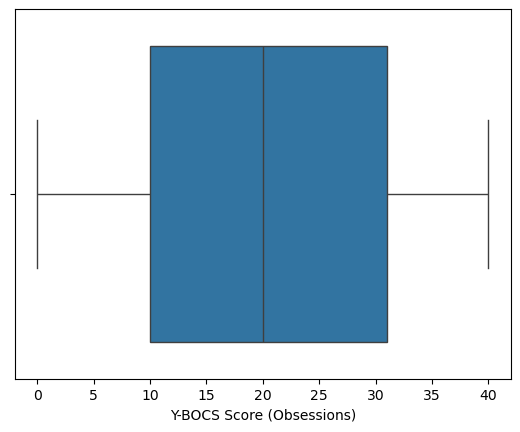

In [66]:
sns.boxplot(data=df, x='Y-BOCS Score (Obsessions)');

In [4]:
female_scores = df[df['Gender'] == 'Female']['Y-BOCS Score (Obsessions)']
male_scores = df[df['Gender'] == 'Male']['Y-BOCS Score (Obsessions)']

In [7]:
t_stat, p_value = ttest_ind(female_scores, male_scores, equal_var=False) 

In [8]:
print("Estatística t:", t_stat)
print("Valor p:", p_value)

Estatística t: 0.4809595684423659
Valor p: 0.6306154799974397


In [9]:
if p_value < 0.05:
    print("Conclusão: Existe uma diferença estatisticamente significativa nos scores Y-BOCS (Obsessões) entre os gêneros.")
else:
    print("Conclusão: Não há evidência de diferença estatisticamente significativa nos scores Y-BOCS (Obsessões) entre os gêneros.")

Conclusão: Não há evidência de diferença estatisticamente significativa nos scores Y-BOCS (Obsessões) entre os gêneros.


## 2.

O conjunto de dados “Sleep_health_and_lifestyle_dataset.csv”
compreende 400 linhas e 13 colunas, cobrindo uma ampla gama de variáveis
relacionadas ao sono e hábitos diários. Inclui detalhes como sexo, idade,
ocupação, duração do sono, qualidade do sono, nível de atividade física,
níveis de estresse, categoria de IMC, pressão arterial, frequência cardíaca,
passos diários e presença ou ausência do distúrbio do sono (Insônia).
O nosso objetivo é avaliar se existe diferença na proporção de pessoas
que possuem ou não o distúrbio do sono (Insônia) para as diferenças
ocupações na base de dados. Use o nível de significância de 5% e caso
encontre diferenças, relate em quais das ocupações vemos essa diferença
significativa.
Use as colunas: (Occupation - ocupação e Sleep Disorder - Distúrbio do
sono (Insônia ou não).

In [74]:
# Carregar o conjunto de dados
data_path = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(data_path)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
1,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
2,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
3,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No
4,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No


In [75]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

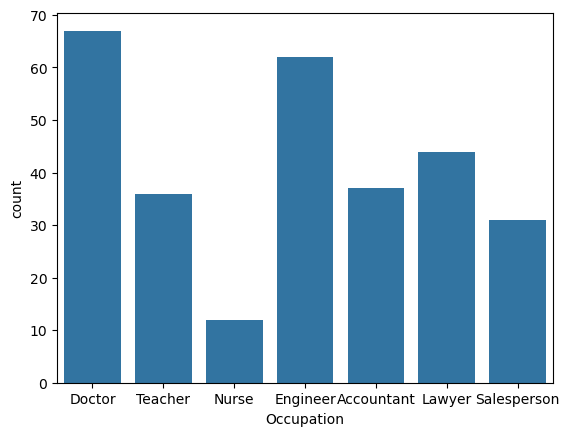

In [77]:
sns.countplot(data=df, x='Occupation');

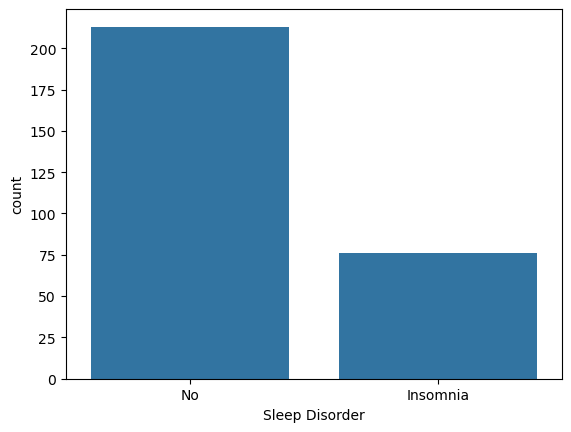

In [79]:
sns.countplot(data=df, x='Sleep Disorder');

In [80]:
table = pd.crosstab(df['Occupation'], df['Sleep Disorder'])

print("Tabela de Contingência:")
print(table)

chi2, p, dof, expected = chi2_contingency(table)

print("Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2}")
print(f"Valor p: {p}")

alpha = 0.05
if p < alpha:
    print("Há uma associação significativa entre ocupação e distúrbio do sono.")

    from itertools import combinations

    results = []
    occupations = table.index
    for occ1, occ2 in combinations(occupations, 2):
        sub_table = table.loc[[occ1, occ2]]
        chi2_pair, p_pair, _, _ = chi2_contingency(sub_table)
        results.append((occ1, occ2, p_pair))

    p_values = [result[2] for result in results]
    _, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

    print("Resultados da análise post hoc:")
    for (occ1, occ2, p_pair), corrected_p in zip(results, corrected_p_values):
        if corrected_p < alpha:
            print(f"Diferença significativa entre {occ1} e {occ2} (p corrigido = {corrected_p:.4f}).")
else:
    print("Não há associação significativa entre ocupação e distúrbio do sono.")

Tabela de Contingência:
Sleep Disorder  Insomnia  No
Occupation                  
Accountant             7  30
Doctor                 3  64
Engineer               5  57
Lawyer                 2  42
Nurse                  3   9
Salesperson           29   2
Teacher               27   9
Teste Qui-Quadrado:
Estatística Qui-Quadrado: 155.27672811256065
Valor p: 5.9210138109735935e-31
Há uma associação significativa entre ocupação e distúrbio do sono.
Resultados da análise post hoc:
Diferença significativa entre Accountant e Salesperson (p corrigido = 0.0000).
Diferença significativa entre Accountant e Teacher (p corrigido = 0.0000).
Diferença significativa entre Doctor e Salesperson (p corrigido = 0.0000).
Diferença significativa entre Doctor e Teacher (p corrigido = 0.0000).
Diferença significativa entre Engineer e Salesperson (p corrigido = 0.0000).
Diferença significativa entre Engineer e Teacher (p corrigido = 0.0000).
Diferença significativa entre Lawyer e Salesperson (p corrigido = 0.

## 3. 

Uma empresa de tecnologia está constantemente analisando o mercado e
buscando novas formas de converter os clientes (fechar contratos).
Pensando nisso, ela investiu em uma empresa de treinamento de vendedores
(VendaPro Academy) que diz que o seu método de vendas é superior aos
métodos convencionais. Para verificar essa hipótese, a empresa de
tecnologia vai avaliar o desempenho dos funcionários.
Vamos comparar o desempenho de 35 vendedores ao utilizar o método
convencional de vendas e o método obtido pelo treinamento com a empresa
VendaPro Academy, medindo o tempo de trabalho em horas necessário
para alcançar uma meta de 10 contratos vendidos. Os dados estão na
base de dados “treinamentoVendedores.csv”. Determine ao nível de 2% de
significância, se o método da empresa VendaPro Academy é realmente
superior ao método convencional da empresa.


In [88]:
url = "TreinamentoVendedores.csv"
df = pd.read_csv(url)
df.head()

,Funcionário,Convencional,VendaPro
0,1,52.483571,38.895782
1,2,49.308678,46.044318
2,3,53.238443,35.201649
3,4,57.615149,38.359070
4,5,48.829233,45.984306


In [89]:
df.isnull().sum()

Funcionário     0
Convencional    0
VendaPro        0
dtype: int64

In [87]:
df.describe()

,Funcionário,Convencional,VendaPro
count,35.000000,35.000000,35.000000
mean,18.000000,49.336786,44.316093
std,10.246951,4.659353,4.398901
min,1.000000,40.433599,35.201649
25%,9.500000,46.994137,41.508084
50%,18.000000,48.829315,44.421759
75%,26.500000,52.181030,47.433281
max,35.000000,59.261391,51.781200


In [92]:
df.corr()

,Funcionário,Convencional,VendaPro
Funcionário,1.000000,-0.153694,0.293170
Convencional,-0.153694,1.000000,-0.186855
VendaPro,0.293170,-0.186855,1.000000


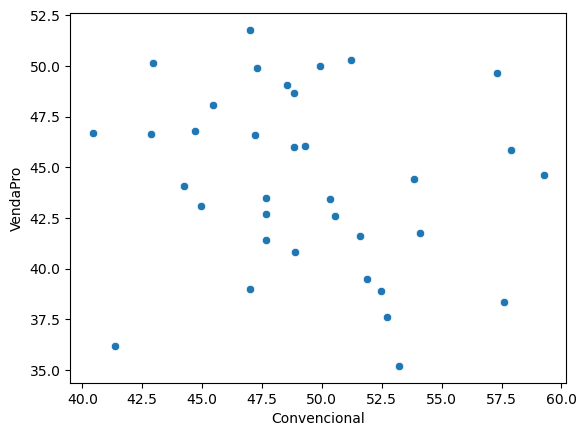

In [96]:
sns.scatterplot(data=df, x='Convencional', y='VendaPro');

In [97]:
if df.isnull().values.any():
    print("Existem valores nulos no dataset. Remova-os antes de continuar.")
    df.dropna(inplace=True) # Remove valores nulos

t_statistic, p_value = stats.ttest_rel(df['Convencional'], df['VendaPro'])

print("Resultados do Teste t Pareado:")
print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

alpha = 0.02
if p_value / 2 < alpha and t_statistic > 0: # Divide o p_value por 2 para o teste unicaudal e verifica se t é positivo
    print(f"\nCom um nível de significância de {alpha*100}%, há evidências estatísticas para concluir que o método VendaPro Academy é superior ao método convencional.")
elif p_value / 2 < alpha and t_statistic < 0:
    print(f"\nCom um nível de significância de {alpha*100}%, há evidências estatísticas para concluir que o método Convencional é superior ao método VendaPro Academy.")
else:
    print(f"\nCom um nível de significância de {alpha*100}%, não há evidências estatísticas suficientes para concluir que o método VendaPro Academy é superior ao método convencional.")

diferenca_medias = (df['Convencional'] - df['VendaPro']).mean()
print(f"A diferença média de tempo para atingir a meta entre o método convencional e o VendaPro é de: {diferenca_medias:.2f} horas.")

Resultados do Teste t Pareado:
Estatística t: 4.2554594832680355
Valor p: 0.00015480357261876546

Com um nível de significância de 2.0%, há evidências estatísticas para concluir que o método VendaPro Academy é superior ao método convencional.
A diferença média de tempo para atingir a meta entre o método convencional e o VendaPro é de: 5.02 horas.


## 4.

Em um mundo onde a música desempenha um papel fundamental nas
experiências diárias, a imersão em uma variedade de gêneros musicais
tornou-se uma parte intrínseca da vida cotidiana. Com a ascensão de
plataformas de streaming e a facilidade de acesso à música, as pessoas
desfrutam da liberdade de escolher seus gêneros preferidos e dedicar tempo
considerável à apreciação das composições que ressoam com suas
emoções.
Este fenômeno despertou um interesse significativo em compreender o
tempo dedicado diariamente às músicas favoritas das pessoas, bem como
explorar se existem diferenças notáveis nos hábitos de escuta entre os
diversos gêneros musicais.
No conjunto de dados "Musicas.csv", encontramos informações detalhadas
sobre usuários de várias idades, incluindo dados sobre seus hábitos
musicais, como o gênero favorito e o tempo diário dedicado à audição
musical.
O objetivo central deste estudo é testar a hipótese de que existe uma
diferença significativa no tempo, em horas, que as pessoas dedicam
diariamente à audição de música, com base em seus gêneros musicais
favoritos.
Use as colunas: (Fav genre - gênero favorito e Hours per day - horas por
dia). Use o nível de significância de 5% para verificar essa hipótese.
Dica: Use o pacote pingouin para facilitar a análise de suposições do teste
escolhido.

In [104]:
file_path = 'Musicas.csv'  
df = pd.read_csv(file_path)

df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
1,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
2,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
4,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.


In [105]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             104
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

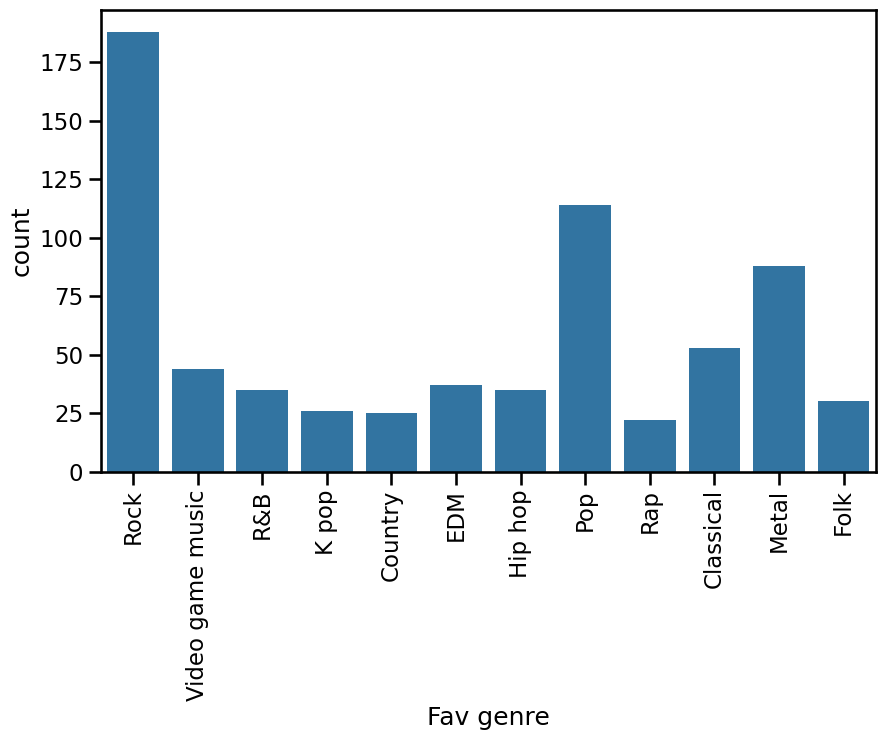

In [109]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Fav genre')

plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='Hours per day'>

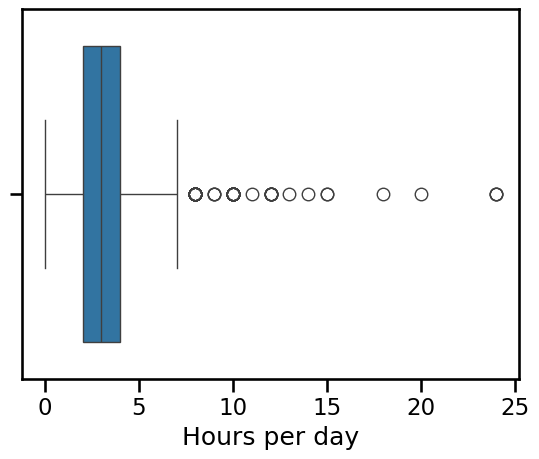

In [110]:
sns.boxplot(data=df, x='Hours per day')

In [111]:
df = df.rename(columns={'Fav genre': 'fav_genre', 'Hours per day': 'hours_per_day'})

if len(df['fav_genre'].unique()) < 2:
    print("Não há grupos suficientes para realizar o teste ANOVA.")
    exit()

print("Teste de Normalidade (Shapiro-Wilk) para cada grupo:")
for genre in df['fav_genre'].unique():
    group = df[df['fav_genre'] == genre]['hours_per_day']
    shapiro_test = stats.shapiro(group)
    print(f"Gênero: {genre}, Estatística: {shapiro_test.statistic:.3f}, p-valor: {shapiro_test.pvalue:.3f}")
    if shapiro_test.pvalue < 0.05:
        print(f"O gênero {genre} não segue uma distribuição normal.")

levene_test = stats.levene(*[df[df['fav_genre'] == genre]['hours_per_day'] for genre in df['fav_genre'].unique()])
print("\nTeste de Homogeneidade das Variâncias (Teste de Levene):")
print(f"Estatística: {levene_test.statistic:.3f}, p-valor: {levene_test.pvalue:.3f}")
if levene_test.pvalue < 0.05:
    print("As variâncias não são homogêneas.")

print("\nTeste ANOVA:")
aov = pg.anova(data=df, dv='hours_per_day', between='fav_genre', detailed=True)
print(aov)

alpha = 0.05
if aov['p-unc'][0] < alpha:
    print(f"\nRejeitamos a hipótese nula. Existe uma diferença significativa no tempo dedicado à música entre os diferentes gêneros musicais (p-valor = {aov['p-unc'][0]:.3f}).")

    print("\nTeste Post-Hoc de Tukey:")
    posthoc = pg.pairwise_tukey(data=df, dv='hours_per_day', between='fav_genre')
    print(posthoc)
else:
    print(f"\nNão rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que existe uma diferença significativa no tempo dedicado à música entre os diferentes gêneros musicais (p-valor = {aov['p-unc'][0]:.3f}).")

Teste de Normalidade (Shapiro-Wilk) para cada grupo:
Gênero: Rock, Estatística: 0.755, p-valor: 0.000
O gênero Rock não segue uma distribuição normal.
Gênero: Video game music, Estatística: 0.830, p-valor: 0.000
O gênero Video game music não segue uma distribuição normal.
Gênero: R&B, Estatística: 0.846, p-valor: 0.000
O gênero R&B não segue uma distribuição normal.
Gênero: K pop, Estatística: 0.797, p-valor: 0.000
O gênero K pop não segue uma distribuição normal.
Gênero: Country, Estatística: 0.893, p-valor: 0.013
O gênero Country não segue uma distribuição normal.
Gênero: EDM, Estatística: 0.813, p-valor: 0.000
O gênero EDM não segue uma distribuição normal.
Gênero: Hip hop, Estatística: 0.819, p-valor: 0.000
O gênero Hip hop não segue uma distribuição normal.
Gênero: Pop, Estatística: 0.816, p-valor: 0.000
O gênero Pop não segue uma distribuição normal.
Gênero: Rap, Estatística: 0.612, p-valor: 0.000
O gênero Rap não segue uma distribuição normal.
Gênero: Classical, Estatística: 0.9

## 5.

O sucesso de uma equipe esportiva não se limita apenas às habilidades
físicas dos atletas, mas também é influenciado por fatores psicológicos,
incluindo o estilo de treinamento adotado pelo treinador. Diferentes
treinadores têm abordagens únicas para motivar, orientar e interagir
com seus atletas. Pensando nisso, um estudo foi feito durante um ano para
explorar o impacto do comportamento do treinador no desempenho de
equipes de atletas, para isso, avaliou-se o desempenho de equipes para
diferentes tipos de treinadores que treinaram a equipe durante dois meses
cada um.
A hipótese em teste é que o comportamento do treinador durante o
treinamento pode ter um efeito significativo no desempenho das equipes na
corrida. Acredita-se que certos tipos de treinadores podem influenciar
positivamente os resultados, enquanto outros podem ter diferentes
implicações no desempenho dos atletas. Entenda como impacto positivo,
uma diminuição no tempo que as equipes levaram para finalizar a
corrida. 
Use a base de dados “ImpactoTreinador.csv” e conclua se existe essa
diferença significativa do comportamento do treinador no tempo de corrida
das equipes, use o nível de significância de 5%.
Com base nos resultados conseguimos identificar uma diferença? Se sim,
entre quais tipos de comportamentos vemos um tempo menor para
finalização da corrida?


In [112]:
# 1. Carregar os dados
url = 'ImpactoTreinador.csv'  # Substitua pelo URL ou caminho local do arquivo
df = pd.read_csv(url)
df.head()

,Equipe,Semana,Tipo de Treinador,Tempo de Corrida
0,1,1,Motivador,42.483571
1,1,1,Rigoroso,46.308678
2,1,1,Colaborador,53.238443
3,1,1,Analítico,47.615149
4,2,1,Motivador,38.829233


In [113]:
df.isnull().sum()

Equipe               0
Semana               0
Tipo de Treinador    0
Tempo de Corrida     0
dtype: int64

In [115]:
df.groupby('Tipo de Treinador')['Tempo de Corrida'].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo de Treinador,,,,,,,,
Analítico,15.0,40.635717,5.261111,32.876259,37.429957,40.984306,44.767063,49.261391
Colaborador,15.0,49.349930,4.688475,41.375411,46.225673,49.421759,52.447380,57.896064
Motivador,15.0,39.208545,3.801195,32.607390,36.806098,38.829233,41.463951,47.328244
Rigoroso,15.0,44.712715,4.272364,37.201649,42.556112,45.829315,47.705727,50.058381


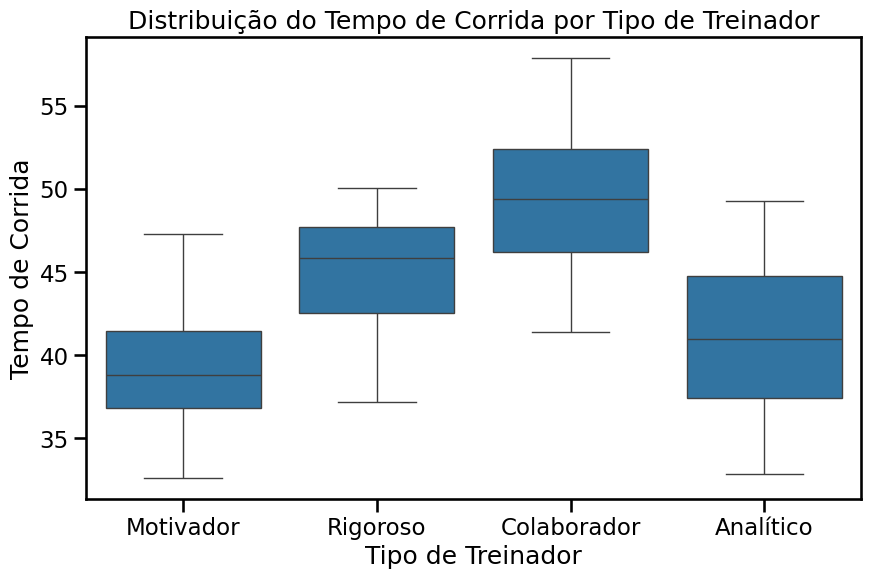

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo de Treinador', y='Tempo de Corrida', data=df)
plt.title('Distribuição do Tempo de Corrida por Tipo de Treinador')
plt.show()

In [117]:
df = df.rename(columns={'Tipo de Treinador': 'Tipo_Treinador', 'Tempo de Corrida': 'Tempo_Corrida'})

Tipo de Treinador: Motivador, p-valor Shapiro-Wilk: 0.9863463044166565
Tipo de Treinador: Rigoroso, p-valor Shapiro-Wilk: 0.06602644920349121
Tipo de Treinador: Colaborador, p-valor Shapiro-Wilk: 0.9958401322364807
Tipo de Treinador: Analítico, p-valor Shapiro-Wilk: 0.5084320306777954
p-valor Levene: 0.4352375984431702
                        sum_sq    df          F        PR(>F)
C(Tipo_Treinador)   934.663367   3.0  15.130747  2.496709e-07
Residual           1153.085763  56.0        NaN           NaN


C:\Users\gabri\AppData\Local\Temp\ipykernel_12220\2372903502.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_resultado['PR(>F)'][0] < 0.05:


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
  Analítico Colaborador   8.7142    0.0   4.3268 13.1016   True
  Analítico   Motivador  -1.4272 0.8246  -5.8146  2.9602  False
  Analítico    Rigoroso    4.077 0.0775  -0.3104  8.4644  False
Colaborador   Motivador -10.1414    0.0 -14.5288  -5.754   True
Colaborador    Rigoroso  -4.6372 0.0344  -9.0246 -0.2498   True
  Motivador    Rigoroso   5.5042 0.0084   1.1168  9.8916   True
---------------------------------------------------------------


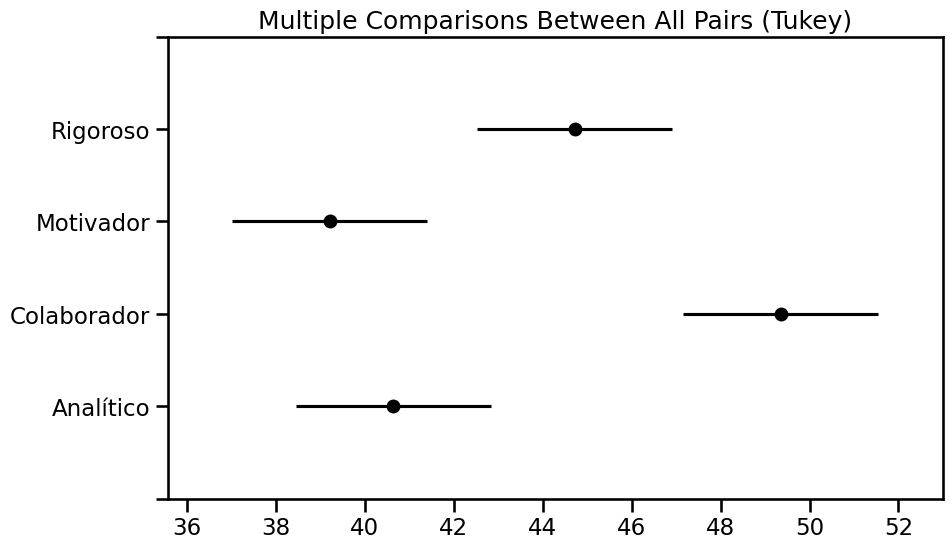


Médias de tempo por treinador:
Tipo_Treinador
Analítico      40.635717
Colaborador    49.349930
Motivador      39.208545
Rigoroso       44.712715
Name: Tempo_Corrida, dtype: float64

O treinador com o menor tempo médio de corrida é o 'Motivador' com 39.21 segundos.
Há diferença significativa no tempo de corrida entre os diferentes tipos de treinadores.


C:\Users\gabri\AppData\Local\Temp\ipykernel_12220\2372903502.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_resultado['PR(>F)'][0] < 0.05:


In [118]:
for tipo in df['Tipo_Treinador'].unique():
    stat, p = stats.shapiro(df[df['Tipo_Treinador'] == tipo]['Tempo_Corrida'])
    print(f'Tipo de Treinador: {tipo}, p-valor Shapiro-Wilk: {p}')

stat, p = stats.levene(*[df[df['Tipo_Treinador'] == tipo]['Tempo_Corrida'] for tipo in df['Tipo_Treinador'].unique()])
print(f'p-valor Levene: {p}')

modelo = ols('Tempo_Corrida ~ C(Tipo_Treinador)', data=df).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)
print(anova_resultado)

if anova_resultado['PR(>F)'][0] < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog=df['Tempo_Corrida'], groups=df['Tipo_Treinador'], alpha=0.05)
    print(tukey)
    tukey.plot_simultaneous()
    plt.show()

medias_tempo = df.groupby('Tipo_Treinador')['Tempo_Corrida'].mean()
print("\nMédias de tempo por treinador:")
print(medias_tempo)

melhor_treinador = medias_tempo.idxmin()
menor_tempo = medias_tempo.min()
print(f"\nO treinador com o menor tempo médio de corrida é o '{melhor_treinador}' com {menor_tempo:.2f} segundos.")

if anova_resultado['PR(>F)'][0] < 0.05:
    print("Há diferença significativa no tempo de corrida entre os diferentes tipos de treinadores.")
else:
    print("Não há diferença significativa no tempo de corrida entre os diferentes tipos de treinadores.")